In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [16]:
X_test.tail()

,Age,Fare,Age_imputed
433,17.0,7.1250,17.0
773,NaN,7.2250,NaN
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0
10,4.0,16.7000,4.0


In [18]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] ##Missing values of X_train and X_test
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]

709   NaN
300   NaN
485   NaN
653   NaN
538   NaN
793   NaN
235   NaN
198   NaN
739   NaN
837   NaN
790   NaN
168   NaN
196   NaN
778   NaN
250   NaN
388   NaN
76    NaN
669   NaN
849   NaN
527   NaN
578   NaN
359   NaN
65    NaN
481   NaN
306   NaN
31    NaN
584   NaN
109   NaN
77    NaN
611   NaN
643   NaN
82    NaN
507   NaN
375   NaN
5     NaN
457   NaN
773   NaN
Name: Age_imputed, dtype: float64

In [25]:
#Koto gulo value missing??
X_train['Age'].isnull().sum() ##140 ta sample chaiiii

140

In [23]:
X_train['Age'].dropna().sample().values ##X_train theke sob NA remove kore ekta sample value pacchi

array([58.])

In [29]:
#Join last two cells 
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values  ##each time 140 random value generated 
                                                                    #fill 140 NaN of Age_imputed with these random values

array([27. ,  9. ,  4. , 21. , 19. , 19. , 23. , 39. , 29. , 45. ,  1. ,
       38. , 42. , 32. , 21. , 15. , 19. ,  2. , 48. , 20. , 16. , 18. ,
       41. , 22. , 63. , 22. , 51. , 70. , 35. , 29. , 31. ,  3. , 51. ,
        5. , 39. ,  4. , 50. , 28. , 24. , 40. , 16. , 30. , 44. , 24. ,
       25. ,  8. , 25. ,  1. ,  2. , 34. , 28. , 35. , 60. , 47. , 36. ,
       33. , 45. , 45. , 18. , 20. , 30. , 36. , 23. , 25. , 41. , 24. ,
       21. , 48. , 42. , 51. , 30. , 36. , 24. , 31. ,  1. , 27. , 54. ,
       31. , 30. , 33. ,  2. , 27. , 29. , 22. , 20. , 30. , 28. , 32. ,
       32.5, 42. , 17. , 38. , 16. , 45.5, 18. , 35. , 24. , 36. , 19. ,
       36. , 52. , 43. , 24. , 45.5, 15. , 17. , 15. , 24. , 25. , 15. ,
       18. , 26. , 34. , 22. , 70.5, 26. , 19. , 25. , 37. , 45. , 28. ,
        7. , 28. ,  9. , 14. , 47. , 24. , 14.5, 35. , 21. , 51. , 34. ,
       22. , 25. , 42. , 64. , 49. , 39. , 25. ,  2. ])

In [30]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [33]:
X_train.sample(5) ##Age imputed a missing value randomly filled

,Age,Fare,Age_imputed
156,16.0,7.7333,16.0
702,18.0,14.4542,18.0
776,NaN,7.7500,25.0
714,52.0,13.0000,52.0
770,24.0,9.5000,24.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


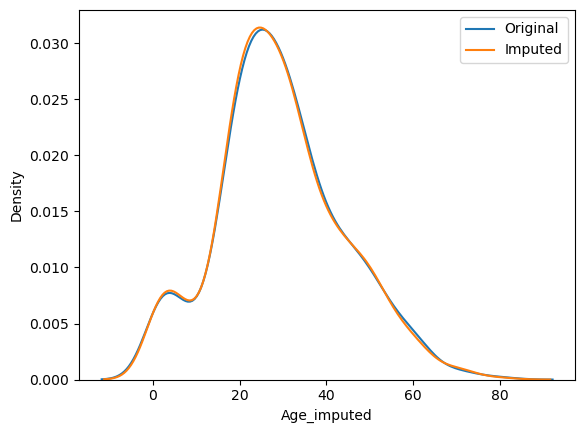

In [42]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
##distribution remains SAME !!!

In [45]:
print("Variance of Age X_train:",X_train['Age'].var())
print("Variance of Imputed Age X_train :",X_train['Age_imputed'].var())  ##ALMOST SAME !!

Variance of Age X_train: 210.2517072477438
Variance of Imputed Age X_train : 209.22395509647822


In [47]:
X_train.cov() ##changed

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,52.512945
Age_imputed,210.251707,52.512945,209.223955


<AxesSubplot:>

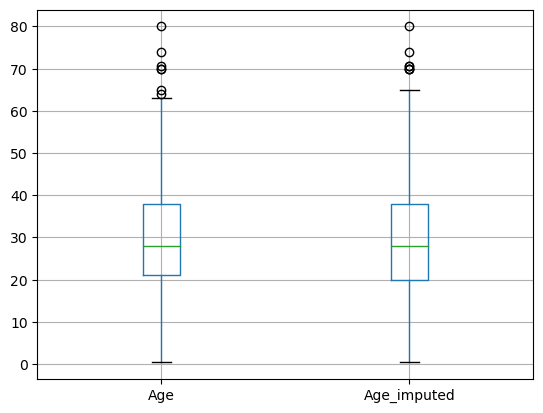

In [50]:
X_train[['Age','Age_imputed']].boxplot() ##no effect on outliers

In [56]:
df=pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [57]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [58]:
X=df  #done so that the target col 'SalePrice' will be used to plot graph
y=df['SalePrice']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [61]:
X_test.tail()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
816,Gd,TA,137000,TA,Gd
1273,Gd,TA,177000,TA,Gd
285,NaN,TA,164700,TA,NaN
194,NaN,TA,127000,TA,NaN
318,TA,TA,260000,TA,TA


In [62]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\HP\AppData\Local\Temp\ipykernel_16136\4256300880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\HP\AppData\Local\Temp\ipykernel_16136\4256300880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\HP\AppData\Local\Temp\ipykernel_16136\4256300880.py:4: SettingWithCopyWarning: 
A value is tryi

In [67]:
X_test.tail() ##NaN filled with random values from categories !!!

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
816,Gd,TA,137000,TA,Gd
1273,Gd,TA,177000,TA,Gd
285,NaN,TA,164700,TA,TA
194,NaN,TA,127000,TA,Gd
318,TA,TA,260000,TA,TA


In [70]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
563,Gd,TA,185000,TA,Gd
1129,NaN,TA,140000,TA,TA
368,Gd,TA,132000,TA,Gd
710,NaN,NaN,52000,TA,Gd
954,NaN,NaN,127500,TA,Gd


In [78]:
X_train['GarageQual'].value_counts()

TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: GarageQual, dtype: int64

In [81]:
#Check that Frequency i.e Number of occurence of each category is same as before or not.
#Huge change in Frequency of each category is BAD.
temp=pd.concat( [X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna())
                ,X_train['GarageQual_imputed'].value_counts()/len(X_train) ],axis=1)
temp
#here we can see freq of each col is almost same

,GarageQual,GarageQual_imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [85]:
temp=pd.concat( [X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna())
                ,X_train['FireplaceQu_imputed'].value_counts()/len(X_train) ],axis=1)
temp

,FireplaceQu,FireplaceQu_imputed
Gd,0.494272,0.492295
TA,0.412439,0.413527
Fa,0.040917,0.041952
Po,0.027823,0.026541
Ex,0.024550,0.025685


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

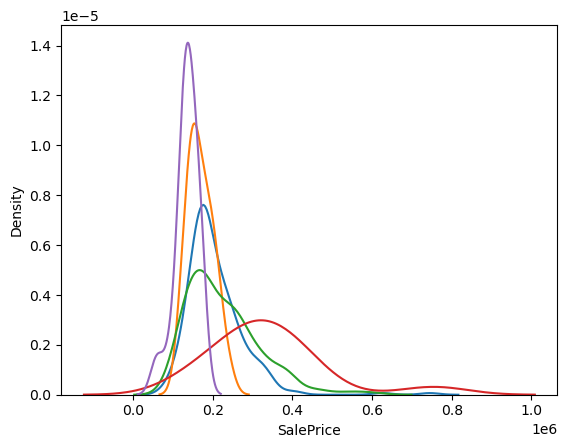

In [88]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

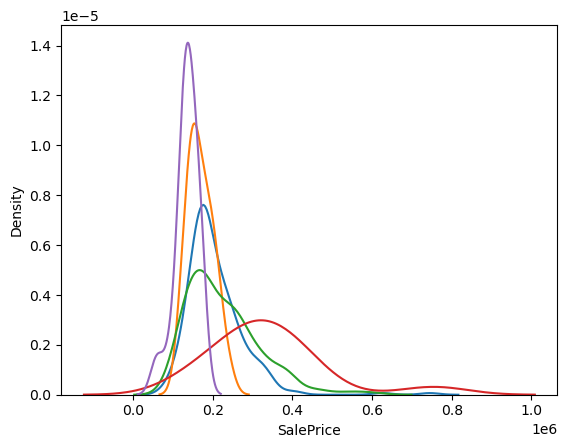